In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential

## Import dataset and prepare for models

In [2]:
student_data = pd.read_csv('Student_performance_data _.csv')
student_data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
from sklearn.model_selection import train_test_split

X = student_data.drop(columns = ['StudentID'])
y = student_data['GPA'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state= 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

## Experiment \#1

A single hidden layer

In [4]:
# Define model with single layer 
model1 = Sequential([
    Dense(64, activation = 'relu', input_dim = X.shape[1]),
    Dense(32, activation= 'relu'),
    Dense(1)
    ]
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model1.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

history1 = model1.fit(X_train, y_train, epochs= 75, batch_size= 100, validation_split= 0.2)

Epoch 1/75
14/14 [==============================] - 0s 5ms/step - loss: 1.2549 - mean_absolute_error: 0.9075 - val_loss: 0.4530 - val_mean_absolute_error: 0.5432
Epoch 2/75
14/14 [==============================] - 0s 1ms/step - loss: 0.3088 - mean_absolute_error: 0.4484 - val_loss: 0.2884 - val_mean_absolute_error: 0.4340
Epoch 3/75
14/14 [==============================] - 0s 1ms/step - loss: 0.2168 - mean_absolute_error: 0.3728 - val_loss: 0.2209 - val_mean_absolute_error: 0.3791
Epoch 4/75
14/14 [==============================] - 0s 1ms/step - loss: 0.1706 - mean_absolute_error: 0.3305 - val_loss: 0.1825 - val_mean_absolute_error: 0.3414
Epoch 5/75
14/14 [==============================] - 0s 1ms/step - loss: 0.1426 - mean_absolute_error: 0.3004 - val_loss: 0.1575 - val_mean_absolute_error: 0.3154
Epoch 6/75
14/14 [==============================] - 0s 1ms/step - loss: 0.1233 - mean_absolute_error: 0.2784 - val_loss: 0.1372 - val_mean_absolute_error: 0.2943
Epoch 7/75
14/14 [==========

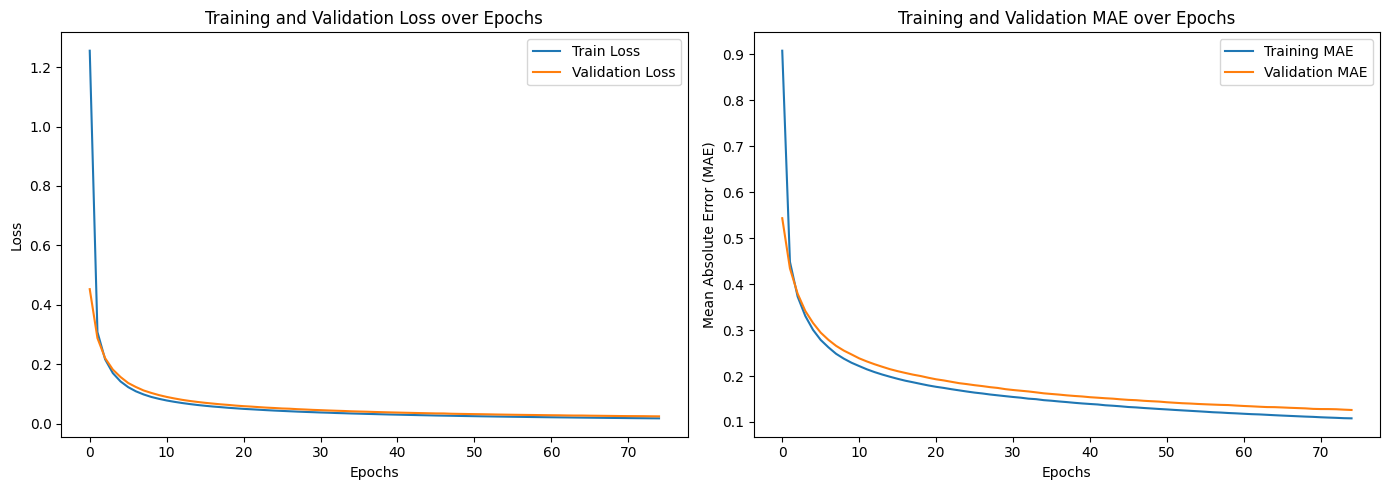

In [6]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history1.history['loss'], label='Train Loss')
ax1.plot(history1.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history1.history['mean_absolute_error']
val_mae = history1.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [7]:
loss_model1, mae_model1 = model1.evaluate(X_test, y_test)

print(f"MSE: {loss_model1} MAE: {mae_model1}")

23/23 [==============================] - 0s 371us/step - loss: 0.0283 - mean_absolute_error: 0.1330
MSE: 0.028322331607341766 MAE: 0.13299314677715302


## Experiment \#2

A set of three hidden layers

In [8]:
# Define model with single layer 
model2 = Sequential([
    Dense(64, activation = 'relu', input_dim = X.shape[1]),
    Dense(32, activation= 'relu'),
    Dense(16, activation= 'relu'),
    Dense(8, activation= 'relu'),
    Dense(1)
    ]
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                960       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3713 (14.50 KB)
Trainable params: 3713 (14.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

history2 = model2.fit(X_train, y_train, epochs= 75, batch_size= 100, validation_split= 0.2)

Epoch 1/75
14/14 [==============================] - 0s 5ms/step - loss: 3.8072 - mean_absolute_error: 1.7151 - val_loss: 2.5940 - val_mean_absolute_error: 1.3576
Epoch 2/75
14/14 [==============================] - 0s 1ms/step - loss: 1.6295 - mean_absolute_error: 1.0446 - val_loss: 1.1534 - val_mean_absolute_error: 0.9202
Epoch 3/75
14/14 [==============================] - 0s 1ms/step - loss: 0.6987 - mean_absolute_error: 0.7042 - val_loss: 0.6078 - val_mean_absolute_error: 0.6691
Epoch 4/75
14/14 [==============================] - 0s 1ms/step - loss: 0.4136 - mean_absolute_error: 0.5384 - val_loss: 0.3970 - val_mean_absolute_error: 0.5271
Epoch 5/75
14/14 [==============================] - 0s 1ms/step - loss: 0.2775 - mean_absolute_error: 0.4311 - val_loss: 0.2765 - val_mean_absolute_error: 0.4321
Epoch 6/75
14/14 [==============================] - 0s 1ms/step - loss: 0.1993 - mean_absolute_error: 0.3608 - val_loss: 0.2126 - val_mean_absolute_error: 0.3810
Epoch 7/75
14/14 [==========

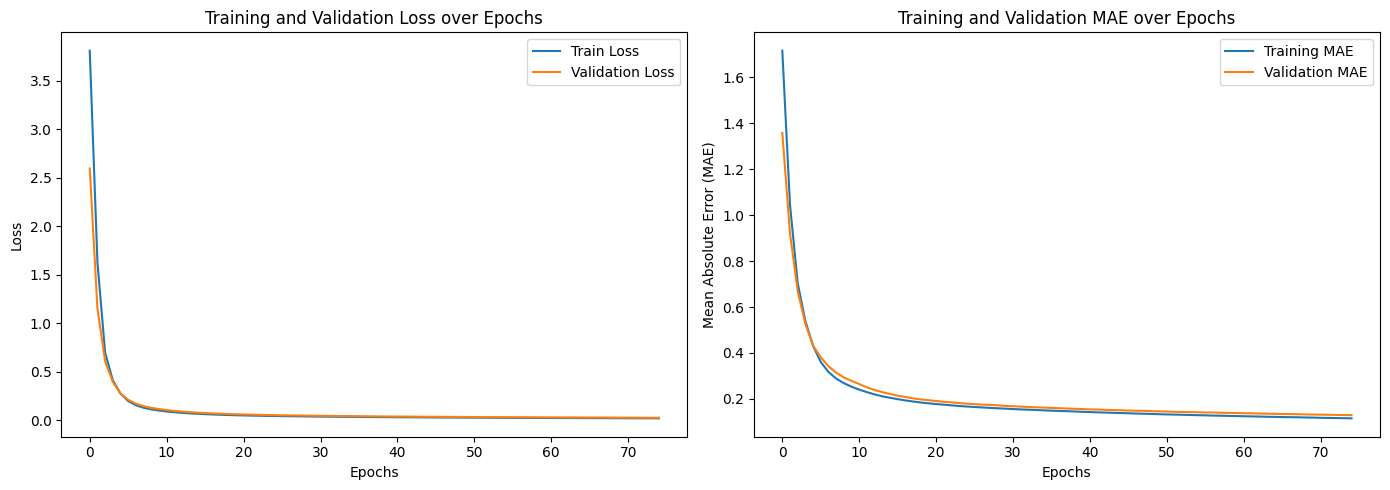

In [10]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history2.history['loss'], label='Train Loss')
ax1.plot(history2.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history2.history['mean_absolute_error']
val_mae = history2.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [11]:
loss_model2, mae_model2 = model2.evaluate(X_test, y_test)

print(f"MSE: {loss_model2} MAE: {mae_model2}")

23/23 [==============================] - 0s 384us/step - loss: 0.0265 - mean_absolute_error: 0.1287
MSE: 0.026507550850510597 MAE: 0.1286705732345581


## Experiment \#3

Add a dropout layer after each dense

In [12]:
# Define model with single layer 
model3 = Sequential([
    Dense(64, activation = 'relu', input_dim = X.shape[1]),
    Dropout(0.2),
    Dense(32, activation= 'relu'),
    Dropout(0.2),
    Dense(16, activation= 'relu'),
    Dropout(0.2),
    Dense(8, activation= 'relu'),
    Dense(1)
    ]
)

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                960       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                

In [13]:
model3.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

history3 = model3.fit(X_train, y_train, epochs= 75, batch_size= 100, validation_split= 0.2)

Epoch 1/75
14/14 [==============================] - 0s 5ms/step - loss: 3.0775 - mean_absolute_error: 1.4541 - val_loss: 0.7200 - val_mean_absolute_error: 0.7460
Epoch 2/75
14/14 [==============================] - 0s 1ms/step - loss: 0.5975 - mean_absolute_error: 0.6236 - val_loss: 0.3289 - val_mean_absolute_error: 0.4868
Epoch 3/75
14/14 [==============================] - 0s 1ms/step - loss: 0.4922 - mean_absolute_error: 0.5598 - val_loss: 0.2895 - val_mean_absolute_error: 0.4550
Epoch 4/75
14/14 [==============================] - 0s 3ms/step - loss: 0.4171 - mean_absolute_error: 0.5091 - val_loss: 0.2320 - val_mean_absolute_error: 0.3951
Epoch 5/75
14/14 [==============================] - 0s 2ms/step - loss: 0.4179 - mean_absolute_error: 0.5131 - val_loss: 0.2155 - val_mean_absolute_error: 0.3810
Epoch 6/75
14/14 [==============================] - 0s 2ms/step - loss: 0.3939 - mean_absolute_error: 0.5016 - val_loss: 0.1932 - val_mean_absolute_error: 0.3594
Epoch 7/75
14/14 [==========

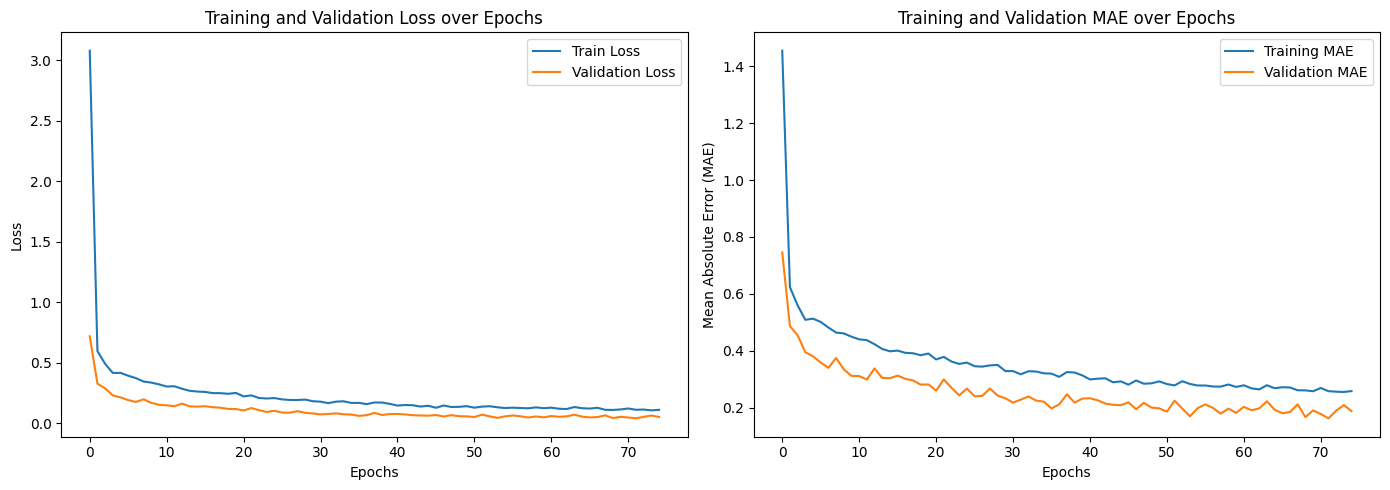

In [14]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history3.history['loss'], label='Train Loss')
ax1.plot(history3.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history3.history['mean_absolute_error']
val_mae = history3.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [15]:
loss_model3, mae_model3 = model3.evaluate(X_test, y_test)

print(f"MSE: {loss_model3} MAE: {mae_model3}")

23/23 [==============================] - 0s 435us/step - loss: 0.0483 - mean_absolute_error: 0.1748
MSE: 0.048298828303813934 MAE: 0.17475731670856476


## Experiment \#4

Add a batch normalization layer before each dropout

In [16]:
# Define model with single layer 
model4 = Sequential([
    Dense(64, activation = 'relu', input_dim = X.shape[1]),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation= 'relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation= 'relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(8, activation= 'relu'),
    Dense(1)
    ]
)

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                960       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [17]:
model4.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

history4 = model4.fit(X_train, y_train, epochs= 75, batch_size= 100, validation_split= 0.2)

Epoch 1/75
14/14 [==============================] - 0s 8ms/step - loss: 2.6711 - mean_absolute_error: 1.3362 - val_loss: 2.3865 - val_mean_absolute_error: 1.3253
Epoch 2/75
14/14 [==============================] - 0s 2ms/step - loss: 1.1635 - mean_absolute_error: 0.8706 - val_loss: 1.6538 - val_mean_absolute_error: 1.1023
Epoch 3/75
14/14 [==============================] - 0s 2ms/step - loss: 0.7826 - mean_absolute_error: 0.6961 - val_loss: 1.3320 - val_mean_absolute_error: 0.9900
Epoch 4/75
14/14 [==============================] - 0s 2ms/step - loss: 0.6312 - mean_absolute_error: 0.6322 - val_loss: 1.0840 - val_mean_absolute_error: 0.8908
Epoch 5/75
14/14 [==============================] - 0s 2ms/step - loss: 0.5761 - mean_absolute_error: 0.5987 - val_loss: 0.8261 - val_mean_absolute_error: 0.7728
Epoch 6/75
14/14 [==============================] - 0s 2ms/step - loss: 0.4926 - mean_absolute_error: 0.5529 - val_loss: 0.6830 - val_mean_absolute_error: 0.7004
Epoch 7/75
14/14 [==========

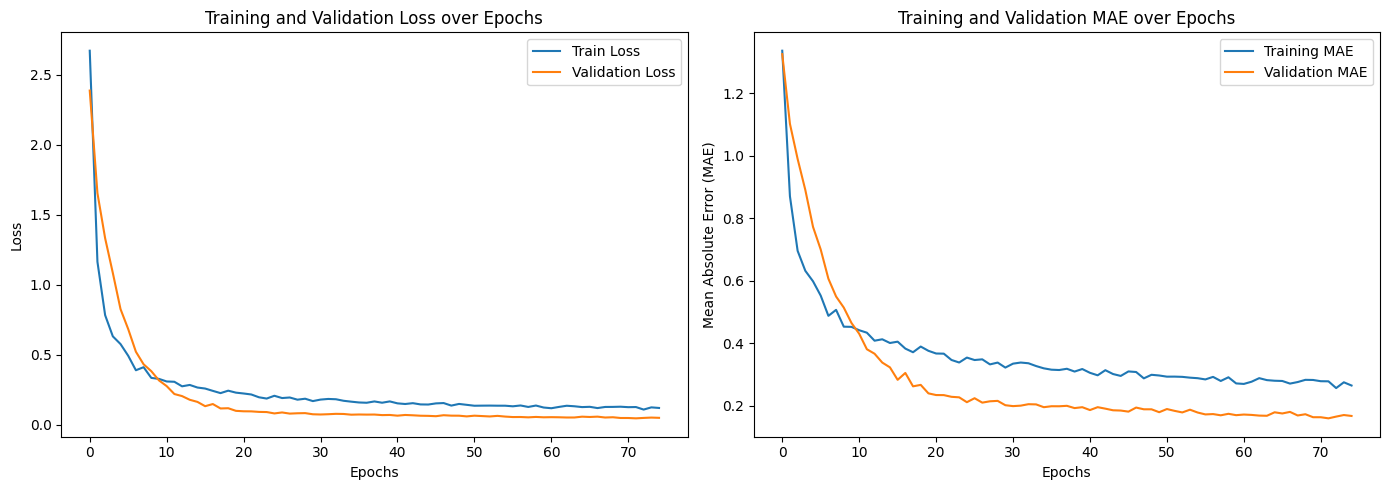

In [18]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Training and Validation Loss
ax1.plot(history4.history['loss'], label='Train Loss')
ax1.plot(history4.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot 2: Training and Validation MAE
train_mae = history4.history['mean_absolute_error']
val_mae = history4.history['val_mean_absolute_error']

ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [19]:
loss_model4, mae_model4= model4.evaluate(X_test, y_test)

print(f"MSE: {loss_model4} MAE: {mae_model4}")

23/23 [==============================] - 0s 410us/step - loss: 0.0474 - mean_absolute_error: 0.1684
MSE: 0.04739423468708992 MAE: 0.16836684942245483


## Results

In [20]:
results = pd.DataFrame({
    'Experiment': [1,2,3,4],
    'Test Loss': [loss_model1, loss_model2, loss_model3,loss_model4],
    'Test MAE': [mae_model1, mae_model2, mae_model3, mae_model4]
})

results

,Experiment,Test Loss,Test MAE
0,1,0.028322,0.132993
1,2,0.026508,0.128671
2,3,0.048299,0.174757
3,4,0.047394,0.168367


The general model architecture was the following: 1 input layer with 64 neurons, 3 hidden layers with 32, 16 and 8 neurons respectively, and an output layer with 1 neuron. Dropout layers had a ratio of 0.2 and batch normalization layers were placed before each dropout layer. Also, all models used the same compiling configuration: epochs= 75, batch_size= 100 and validation_split= 0.2.

**Best Performance:** Experiment 2 achieves the lowest test loss and MAE, indicating that adding additional dense layers improved the model's performance.

**Effect of Dropout:** Experiment 3 demonstrates that adding dropout layers can degrade performance in this case, possibly because the model was not overfitting severely before.

**Effect of Batch Normalization:** Experiment 4 shows that batch normalization slightly recovers some performance lost due to dropout, but it is still not as effective as the simpler models (Experiments 1 and 2).

In summary, the simplest configuration (Experiment 1) and the model with three dense layers (Experiment 2) perform best, suggesting that complexity beyond three dense layers with dropout and batch normalization may not be necessary for this specific dataset.